In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
data_analisis = pd.read_csv('preparation.csv')

In [3]:
def hapus_karakter(teks):
    if isinstance(teks, list):
        teks = ' '.join(teks)
    elif pd.isna(teks):
        return ""
    teks = teks.replace(' m ', ' ').replace(' y ', ' ').replace(' n ', ' ').replace(' e ', ' ').replace('[]', ' ').replace(',', ' ').replace(']', ' ').replace('[', ' ')
    teks = teks.replace("'", "") 
    teks = re.sub(r'\s+', ' ', teks)
    return teks.strip()
data_analisis['more_cleaned_konten'] = data_analisis['data_post_cleaned'].apply(hapus_karakter)
data_analisis['fix_konten'] = data_analisis['more_cleaned_konten'].apply(hapus_karakter)

In [4]:
data_analisis

,Judul,Link,judul_lower_case,remove_html,remove_special_characters,remove_escape_characters,cleaned_space,tokenisasi,remove_stopword_english,remove_stopword_indonesia,data_post_cleaned,more_cleaned_konten,fix_konten
0,Survei Ungkap 70% Gen Z Minta Bantuan Orang Tu...,https://wolipop.detik.com/worklife/d-7633465/s...,survei ungkap 70% gen z minta bantuan orang tu...,survei ungkap 70% gen z minta bantuan orang tu...,survei ungkap gen z minta bantuan orang tua u...,survei ungkap gen z minta bantuan orang tua u...,survei ungkap gen z minta bantuan orang tua u...,"['survei', 'ungkap', 'gen', 'z', 'minta', 'ban...","['survei', 'ungkap', 'gen', 'z', 'minta', 'ban...","['survei', 'gen', 'z', 'bantuan', 'orang', 'tu...","['survei', 'gen', 'z', 'bantuan', 'orang', 'tu...",survei gen z bantuan orang tua lamar pekerjaan,survei gen z bantuan orang tua lamar pekerjaan
1,'Garut di Eropa' dan Problem Pengetahuan Umum ...,https://news.detik.com/kolom/d-7632852/garut-d...,'garut di eropa' dan problem pengetahuan umum ...,'garut di eropa' dan problem pengetahuan umum ...,garut di eropa dan problem pengetahuan umum ge...,garut di eropa dan problem pengetahuan umum ge...,garut di eropa dan problem pengetahuan umum ge...,"['garut', 'di', 'eropa', 'dan', 'problem', 'pe...","['garut', 'di', 'eropa', 'dan', 'problem', 'pe...","['garut', 'eropa', 'problem', 'pengetahuan', '...","['garut', 'eropa', 'problem', 'pengetahuan', '...",garut eropa problem pengetahuan gen zalpha,garut eropa problem pengetahuan gen zalpha
2,"Vokalis Close to Breathe Punya Project Solo, S...",https://www.detik.com/pop/music/d-7633322/voka...,"vokalis close to breathe punya project solo, s...","vokalis close to breathe punya project solo, s...",vokalis close to breathe punya project solo si...,vokalis close to breathe punya project solo si...,vokalis close to breathe punya project solo si...,"['vokalis', 'close', 'to', 'breathe', 'punya',...","['vokalis', 'close', 'breathe', 'punya', 'proj...","['vokalis', 'close', 'breathe', 'project', 'so...","['vokalis', 'close', 'breathe', 'project', 'so...",vokalis close breathe project solo siap ep mil...,vokalis close breathe project solo siap ep mil...
3,Video: Gita Mau Bangun 5.000 Lapangan Olahraga...,https://20.detik.com/detikupdate/20241111-2411...,video: gita mau bangun 5.000 lapangan olahraga...,video: gita mau bangun 5.000 lapangan olahraga...,video gita mau bangun lapangan olahraga atasi...,video gita mau bangun lapangan olahraga atasi...,video gita mau bangun lapangan olahraga atasi...,"['video', 'gita', 'mau', 'bangun', 'lapangan',...","['video', 'gita', 'mau', 'bangun', 'lapangan',...","['video', 'gita', 'bangun', 'lapangan', 'olahr...","['video', 'gita', 'bangun', 'lapangan', 'olahr...",video gita bangun lapangan olahraga atasi ntal...,video gita bangun lapangan olahraga atasi ntal...
4,Video: Program 4 Cawagub Jabar Biar Gen Z Berm...,https://news.detik.com/detiktv/d-7633764/video...,video: program 4 cawagub jabar biar gen z berm...,video: program 4 cawagub jabar biar gen z berm...,video program cawagub jabar biar gen z bermen...,video program cawagub jabar biar gen z bermen...,video program cawagub jabar biar gen z bermen...,"['video', 'program', 'cawagub', 'jabar', 'biar...","['video', 'program', 'cawagub', 'jabar', 'biar...","['video', 'program', 'cawagub', 'jabar', 'biar...","['video', 'program', 'cawagub', 'jabar', 'biar...",video program cawagub jabar biar gen z berment...,video program cawagub jabar biar gen z berment...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Survei BPS Ungkap 10 Juta Gen Z Menganggur, Ap...",https://www.detik.com/edu/edutainment/d-735073...,"survei bps ungkap 10 juta gen z menganggur, ap...","survei bps ungkap 10 juta gen z menganggur, ap...",survei bps ungkap juta gen z menganggur apa p...,survei bps ungkap juta gen z menganggur apa p...,survei bps ungkap juta gen z menganggur apa p...,"['survei', 'bps', 'ungkap', 'juta', 'gen', 'z'...","['survei', 'bps', 'ungkap', 'juta', 'gen',

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan teks dari kolom 'fix_konten' setelah menghapus nilai NaN
text_data = ' '.join(data_analisis['fix_konten'].dropna())  # Pastikan data_analisis dan 'fix_konten' ada

# Membuat WordCloud tanpa font khusus
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text_data)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan axis
plt.show()

ValueError: Only supported for TrueType fonts

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20) # max_features membatasi kata-kata paling penting (misal 1000 kata)
# Menerapkan TF-IDF pada kolom 'data_post_cleaned'
tfidf_matrix = tfidf_vectorizer.fit_transform(data_analisis['fix_konten'])
# Mengubah hasil TF-IDF menjadi DataFrame agar lebih mudah dianalisis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Menampilkan 5 baris pertama dari hasil TF-IDF
print(tfidf_df)

    alasan  gaya       gen  generasi  genz     janji     kerja  milenial  \
0      0.0   0.0  0.212147       0.0   0.0  0.000000  0.000000  0.000000   
1      0.0   0.0  1.000000       0.0   0.0  0.000000  0.000000  0.000000   
2      0.0   0.0  0.270720       0.0   0.0  0.000000  0.000000  0.962658   
3      0.0   0.0  0.330469       0.0   0.0  0.000000  0.000000  0.000000   
4      0.0   0.0  0.330469       0.0   0.0  0.000000  0.000000  0.000000   
..     ...   ...       ...       ...   ...       ...       ...       ...   
95     0.0   0.0  0.293490       0.0   0.0  0.000000  0.000000  0.000000   
96     0.0   0.0  0.195035       0.0   0.0  0.000000  0.000000  0.000000   
97     0.0   0.0  0.195035       0.0   0.0  0.000000  0.000000  0.000000   
98     0.0   0.0  0.321960       0.0   0.0  0.000000  0.946753  0.000000   
99     0.0   0.0  0.169592       0.0   0.0  0.636648  0.000000  0.000000   

    pakai  pekerjaan    pinjol   pramono   ri  rumah    survei  terjerat  \
0     0.0  

In [7]:
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)
top_n = 20
top_words = mean_tfidf.head(top_n)
top_words

gen          0.459754
video        0.074283
kerja        0.074044
pekerjaan    0.054708
survei       0.050725
rumah        0.043228
genz         0.040000
ri           0.036100
milenial     0.035951
pramono      0.034325
alasan       0.034093
generasi     0.033260
tren         0.032205
viral        0.029330
terjerat     0.026402
pinjol       0.026402
uang         0.026275
gaya         0.022698
pakai        0.021931
janji        0.019099
dtype: float64

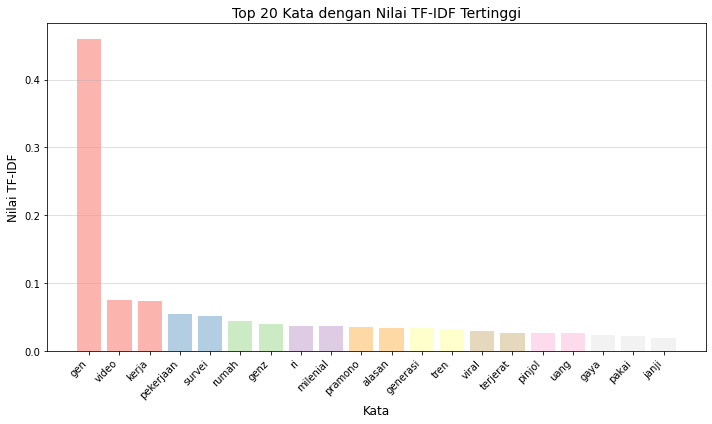

In [8]:
# Membuat skema warna yang lebih sederhana
colors = plt.cm.Pastel1(np.linspace(0, 1, top_n))

# Membuat figure dan axis
plt.figure(figsize=(10, 6))

# Membuat bar chart
plt.bar(top_words.index, top_words.values, color=colors)

# Memberikan judul dan label
plt.title(f'Top {top_n} Kata dengan Nilai TF-IDF Tertinggi', fontsize=14)
plt.xlabel('Kata', fontsize=12)
plt.ylabel('Nilai TF-IDF', fontsize=12)

# Mengatur tampilan sumbu x agar lebih jelas
plt.xticks(rotation=45, ha='right')

# Menambahkan grid pada sumbu y
plt.grid(axis='y', linestyle='-', alpha=0.5)

# Menampilkan plot
plt.tight_layout()  # Agar tidak terpotong
plt.show()